<a href="https://colab.research.google.com/github/Tessellate-Imaging/Monk_Object_Detection/blob/master/example_notebooks/19_pytorch_textsnake/Training%20Inference%20with%20mat%20type%20annotation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation

 - Run these commands
     
     - git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git
     
     - cd Monk_Object_Detection/19_pytorch_textsnake/installation
     
 - Select the right file and run
 
     - cat requirements.txt | xargs -n 1 -L 1 pip install

In [ ]:
! git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git

In [ ]:
! cd Monk_Object_Detection/19_pytorch_textsnake/installation && cat requirements.txt | xargs -n 1 -L 1 pip install

In [1]:
import os
import sys
sys.path.append("Monk_Object_Detection/19_pytorch_textsnake/lib")

In [2]:
from train_engine import Detector

In [3]:
gtf = Detector();

# Dataset download
  Credits - https://github.com/cs-chan/Total-Text-Dataset

In [4]:
# ! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1bC68CzsSVTusZVvOkk7imSZSbgD1MqK2' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1bC68CzsSVTusZVvOkk7imSZSbgD1MqK2" -O totaltext.zip && rm -rf /tmp/cookies.txt

In [5]:
# ! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=19quCaJGePvTc3yPZ7MAGNijjKfy77-ke' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=19quCaJGePvTc3yPZ7MAGNijjKfy77-ke" -O groundtruth_text.zip && rm -rf /tmp/cookies.txt

In [6]:
# ! unzip -qq totaltext.zip

In [7]:
# ! unzip -qq groundtruth_text.zip

In [12]:
# Mat Dataset details

# Dataset structure

#       Master_Folder
#            |
#            |---------Train
#                        |
#                        |-----Images
#                                |
#                                |-------img1.jpg
#                                |-------img2.jpg
#                                |-------(and so on...)
#                        |
#                        |-----Annotations
#                                |
#                                |-------img1.mat
#                                |-------img2.mat
#                                |-------(and so on...)
#            |
#            |---------Validation
#                        |
#                        |-----Images
#                                |
#                                |-------img1.jpg
#                                |-------img2.jpg
#                                |-------(and so on...)
#                        |
#                        |-----Annotations
#                                |
#                                |-------img1.mat
#                                |-------img2.mat
#                                |-------(and so on...)



# master-key 'polygt'
# x coordinates in cell[1][0]
# y coordinates in cell[3][0]
# text in cell[4][0] 
# orientation in cell[5][0] 
#    - Horizontal: h
#    - Multi-Oriented: m
#    - Curved: c

In [4]:
img_folder = "Images/Train/";
anno_folder = "Groundtruth/Polygon/Train/";
gtf.Train_Dataset(img_folder, anno_folder, annotation_type="mat")

In [5]:
img_folder = "Images/Test/";
anno_folder = "Groundtruth/Polygon/Test/";
gtf.Val_Dataset(img_folder, anno_folder, annotation_type="mat")

In [6]:
gtf.Dataset_Params(batch_size=2, 
                       num_workers=2, 
                       input_size=512,
                       mean=(0.485, 0.456, 0.406),
                       std=(0.229, 0.224, 0.225),
                       rescale=255.0,
                       input_channel=1);

In [7]:
gtf.Model_Params(model_type="vgg", use_pretrained=True, use_gpu=True, use_distributed=False)

In [8]:
# If using pretrained model
# Download pretrained model from https://drive.google.com/drive/folders/1YZmT-VZLpWKDaISdgD_l-GRWer4AZsaS
# And save in your working directory
# Model provided by https://github.com/princewang1994/TextSnake.pytorch

# ! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1YvsuxKH9M-Gseur9gc-SZJb3pCpTUddi' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1YvsuxKH9M-Gseur9gc-SZJb3pCpTUddi" -O textsnake_vgg_180.pth && rm -rf /tmp/cookies.txt

In [9]:
gtf.Hyper_Params(optimizer="adam",
                     lr=0.0001,
                     weight_decay=0,
                     gamma=0.1,
                     momentum=0.9)

In [10]:
gtf.Training_Params(epochs=5, output_dir="trained_weights", experiment_name="exp", save_freq=10, display_freq=50);

In [ ]:
gtf.Train();

In [1]:
import os
import sys
sys.path.append("Monk_Object_Detection/19_pytorch_textsnake/lib")

In [2]:
from infer_engine import Infer

In [3]:
gtf = Infer();

In [4]:
gtf.Dataset_Params(input_size=512, mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))

In [5]:
gtf.Model_Params(model_type="vgg", model_path="trained_weights/exp/textsnake_vgg_final.pth", use_gpu=True)

Loading from trained_weights/exp/textsnake_vgg_final.pth


In [6]:
gtf.Predict("text1.png", 
            output_img_path="output.jpg",
            output_txt_path="output.txt",
            tr_thresh = 0.4,
            tcl_thresh = 0.4)

Image loading time: 0.031740665435791016
Inference time - 1.5693464279174805
Writing output time - 0.0177614688873291


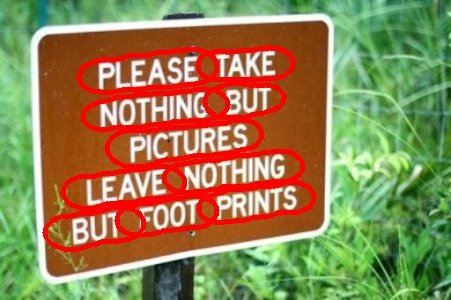

In [7]:
from IPython.display import Image
Image(filename="output.jpg") 